In [1]:
import numpy as np 
import pandas as pd 

In [3]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
test=pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.Survived.unique()

array([0, 1])

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
df=df.drop(['PassengerId','Ticket','Cabin'],axis=1)
test=test.drop(['PassengerId','Ticket','Cabin'],axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [11]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [12]:
df['Sex']=df['Sex'].map({'male':1,'female':0})
test['Sex']=test['Sex'].map({'male':1,'female':0})
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C


In [13]:
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q


In [14]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [15]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [16]:
df[['Survived','Pclass']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [19]:
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


# Creating new features

In [20]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,Mr


In [21]:
pd.crosstab(df['Title'],df['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
df.Title.value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [23]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [24]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,Miss


In [25]:
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [26]:
test.Title.value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: count, dtype: int64

In [27]:
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [28]:
df.Title.value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [29]:
title_map={
    'Mr':1,
    'Miss':2,
    'Mrs':3,
    'Master':4,
    'Rare':0
}
df['Title']=df['Title'].map(title_map)
test['Title']=test['Title'].map(title_map)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,1


In [30]:
test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S,3
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q,1


In [31]:
df.Title.value_counts()

Title
1    517
2    185
3    126
4     40
0     23
Name: count, dtype: int64

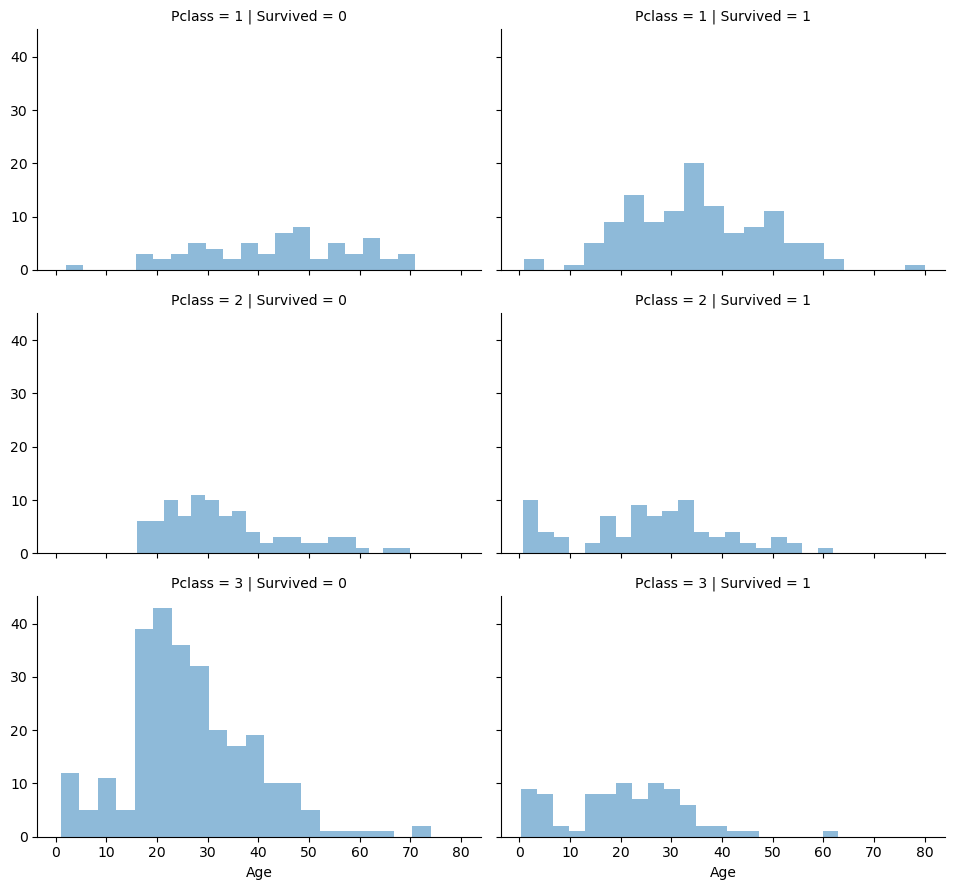

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
grid = sns.FacetGrid(df, row='Pclass', col='Survived',aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [33]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,3,2
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,3,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,1,1


In [34]:
df.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,1,22.0,1,0,7.2500,S,1,2
1,1,1,0,38.0,1,0,71.2833,C,3,2
2,1,3,0,26.0,0,0,7.9250,S,2,1
3,1,1,0,35.0,1,0,53.1000,S,3,2
4,0,3,1,35.0,0,0,8.0500,S,1,1


In [36]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [37]:
df.Embarked.isnull().sum()

2

In [38]:
df.shape

(891, 10)

In [39]:
df1=df.dropna(subset=['Embarked'], how='any')
df.shape

(891, 10)

In [40]:
df1.shape

(889, 10)

In [41]:
df1.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         332 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked    418 non-null    object 
 7   Title       418 non-null    int64  
 8   FamilySize  418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


In [43]:
e_map={
    'S':1,
    'C':2,
    'Q':3
}
df1['Embarked']=df1['Embarked'].map(e_map)
test['Embarked']=test['Embarked'].map(e_map)
df1.head()

/var/folders/22/83yz19b1087bb_kxdr5np5ym0000gn/T/ipykernel_15428/1193595486.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Embarked']=df1['Embarked'].map(e_map)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,1,22.0,1,0,7.2500,1,1,2
1,1,1,0,38.0,1,0,71.2833,2,3,2
2,1,3,0,26.0,0,0,7.9250,1,2,1
3,1,1,0,35.0,1,0,53.1000,1,3,2
4,0,3,1,35.0,0,0,8.0500,1,1,1


In [44]:
df1.Embarked.value_counts()

Embarked
1    644
2    168
3     77
Name: count, dtype: int64

<Axes: >

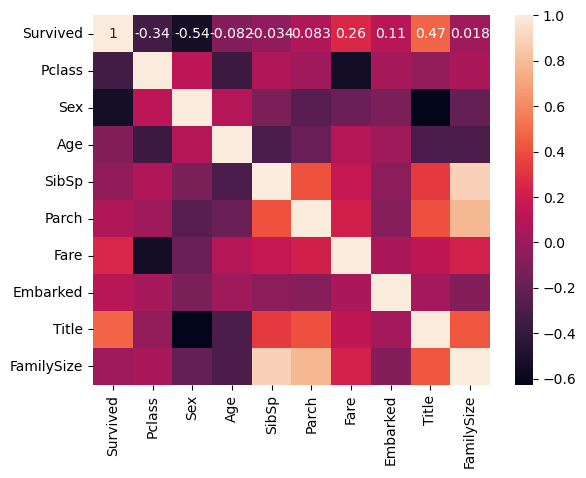

In [45]:
sns.heatmap(df1.corr(),annot=True)

In [46]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize'],
      dtype='object')

In [47]:
df1=df1.drop(['SibSp','Parch'],axis=1)
test=test.drop(['SibSp','Parch'],axis=1)
df1.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,1,22.0,7.2500,1,1,2
1,1,1,0,38.0,71.2833,2,3,2
2,1,3,0,26.0,7.9250,1,2,1


In [48]:
test.head(3)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,1,34.5,7.8292,3,1,1
1,3,0,47.0,7.0000,1,3,2
2,2,1,62.0,9.6875,3,1,1


In [49]:
df1.FamilySize.value_counts()

FamilySize
1     535
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [50]:
df1['Alone']=df1[df1.FamilySize==1].FamilySize
test['Alone']=test[test.FamilySize==1].FamilySize

In [51]:
df1['Alone'].fillna(0,inplace=True)
test['Alone'].fillna(0,inplace=True)

In [52]:
df1.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        0
Title           0
FamilySize      0
Alone           0
dtype: int64

In [53]:
df1.Fare.nunique()

247

In [54]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,1,22.0,1,0,7.2500,S,1,2
1,1,1,0,38.0,1,0,71.2833,C,3,2
2,1,3,0,26.0,0,0,7.9250,S,2,1


In [55]:
df1[['Age','Title']].groupby('Title').mean()

,Age
Title,
0,45.545455
1,32.368090
2,21.736486
3,35.546296
4,4.574167


In [56]:
df1[df1.Title==2][['Age','Title']].tail(10)

,Age,Title
835,39.0,2
842,30.0,2
852,9.0,2
853,16.0,2
863,NaN,2
866,27.0,2
875,15.0,2
882,22.0,2
887,19.0,2
888,NaN,2


In [57]:
age_map={
    0:	45.545455,
1:	32.368090,
2:	21.736486,
3:	35.546296,
4:	4.574167,
}
df1['mean_age_title']=df1.Title.map(age_map)
test['mean_age_title']=test.Title.map(age_map)
df1

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Alone,mean_age_title
0,0,3,1,22.0,7.2500,1,1,2,0.0,32.368090
1,1,1,0,38.0,71.2833,2,3,2,0.0,35.546296
2,1,3,0,26.0,7.9250,1,2,1,1.0,21.736486
3,1,1,0,35.0,53.1000,1,3,2,0.0,35.546296
4,0,3,1,35.0,8.0500,1,1,1,1.0,32.368090
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,1,0,1,1.0,45.545455
887,1,1,0,19.0,30.0000,1,2,1,1.0,21.736486
888,0,3,0,NaN,23.4500,1,2,4,0.0,21.736486
889,1,1,1,26.0,30.0000,2,1,1,1.0,32.368090


In [58]:
df1.Age=df1.Age.fillna(df1.mean_age_title)
test.Age=test.Age.fillna(test.mean_age_title)
df1

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Alone,mean_age_title
0,0,3,1,22.000000,7.2500,1,1,2,0.0,32.368090
1,1,1,0,38.000000,71.2833,2,3,2,0.0,35.546296
2,1,3,0,26.000000,7.9250,1,2,1,1.0,21.736486
3,1,1,0,35.000000,53.1000,1,3,2,0.0,35.546296
4,0,3,1,35.000000,8.0500,1,1,1,1.0,32.368090
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,1,0,1,1.0,45.545455
887,1,1,0,19.000000,30.0000,1,2,1,1.0,21.736486
888,0,3,0,21.736486,23.4500,1,2,4,0.0,21.736486
889,1,1,1,26.000000,30.0000,2,1,1,1.0,32.368090


In [59]:
test.isnull().sum()

Pclass            0
Sex               0
Age               0
Fare              1
Embarked          0
Title             0
FamilySize        0
Alone             0
mean_age_title    0
dtype: int64

In [60]:
df1.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age               0
Fare              0
Embarked          0
Title             0
FamilySize        0
Alone             0
mean_age_title    0
dtype: int64

In [61]:
title_map

{'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 0}

In [62]:
df1=df1.drop('mean_age_title',axis=1)
test=test.drop('mean_age_title',axis=1)
df1.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Alone
0,0,3,1,22.0,7.2500,1,1,2,0.0
1,1,1,0,38.0,71.2833,2,3,2,0.0
2,1,3,0,26.0,7.9250,1,2,1,1.0


In [63]:
test.head(3)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Alone
0,3,1,34.5,7.8292,3,1,1,1.0
1,3,0,47.0,7.0000,1,3,2,0.0
2,2,1,62.0,9.6875,3,1,1,1.0


In [64]:
test.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          1
Embarked      0
Title         0
FamilySize    0
Alone         0
dtype: int64

In [65]:
test[['Pclass','Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,94.280297
2,22.202104
3,12.459678


In [66]:
test[test.isna().any(axis=1)]

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Alone
152,3,1,60.5,NaN,1,1,1,1.0


In [67]:
test=test.fillna(12.5,axis=1)
test.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
FamilySize    0
Alone         0
dtype: int64

In [68]:
df1.isna().any()

Survived      False
Pclass        False
Sex           False
Age           False
Fare          False
Embarked      False
Title         False
FamilySize    False
Alone         False
dtype: bool

# Model Building

In [74]:
pip install xgboost

  Using cached xgboost-2.1.0-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.0-py3-none-macosx_12_0_arm64.whl (1.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [76]:
def evaluate_model(model, X_test, y_test, model_name, metrics_df):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    score=round(model.score(X_train, y_train) * 100, 2)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None
    print(confusion_matrix(y_test, y_pred))
    print("-" * 30)
    new_row = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'ROC-AUC': [roc_auc],
        'model_score':[score]
    })
    if new_row.Model.iloc[0] not  in metrics_df['Model'].values:
      metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
    print(classification_report(y_test, y_pred, zero_division=1))
    print("-" * 30)
    return metrics_df

In [77]:
X=df1.drop(['Survived'],axis=1)
y=df1['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Alone
230,1,0,35.00000,83.4750,1,3,2,0.0
304,3,1,32.36809,8.0500,1,1,1,1.0
838,3,1,32.00000,56.4958,1,1,1,1.0
751,3,1,6.00000,12.4750,1,4,2,0.0
320,3,1,22.00000,7.2500,1,1,1,1.0
...,...,...,...,...,...,...,...,...
257,1,0,30.00000,86.5000,1,2,1,1.0
644,3,0,0.75000,19.2583,2,2,4,0.0
250,3,1,32.36809,7.2500,1,1,1,1.0
665,2,1,32.00000,73.5000,1,1,3,0.0


In [78]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'])

In [79]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

metrics_df = evaluate_model(log_reg, X_test, y_test, 'Logistic Regression', metrics_df)
metrics_df

[[141  17]
 [ 37  72]]
------------------------------
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       158
           1       0.81      0.66      0.73       109

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.78       267
weighted avg       0.80      0.80      0.79       267

------------------------------


/var/folders/22/83yz19b1087bb_kxdr5np5ym0000gn/T/ipykernel_15428/2375596245.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.797753,0.808989,0.66055,0.727273,0.841162,84.41


In [80]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
metrics_df=evaluate_model(random_forest, X_test, y_test, 'Random Forest', metrics_df)
metrics_df

[[141  17]
 [ 34  75]]
------------------------------
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       158
           1       0.82      0.69      0.75       109

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.797753,0.808989,0.660550,0.727273,0.841162,84.41
1,Random Forest,0.808989,0.815217,0.688073,0.746269,0.826791,98.71


In [81]:
svm = SVC(probability=True,kernel='poly')
svm.fit(X_train, y_train)
metrics_df=evaluate_model(svm, X_test, y_test, 'S V M', metrics_df)
metrics_df

[[152   6]
 [ 96  13]]
------------------------------
              precision    recall  f1-score   support

           0       0.61      0.96      0.75       158
           1       0.68      0.12      0.20       109

    accuracy                           0.62       267
   macro avg       0.65      0.54      0.48       267
weighted avg       0.64      0.62      0.53       267

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.797753,0.808989,0.660550,0.727273,0.841162,84.41
1,Random Forest,0.808989,0.815217,0.688073,0.746269,0.826791,98.71
2,S V M,0.617978,0.684211,0.119266,0.203125,0.742742,69.61


In [82]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


metrics_df = evaluate_model(decision_tree, X_test, y_test, 'Decision Tree', metrics_df)
metrics_df


[[129  29]
 [ 43  66]]
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       158
           1       0.69      0.61      0.65       109

    accuracy                           0.73       267
   macro avg       0.72      0.71      0.71       267
weighted avg       0.73      0.73      0.73       267

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.797753,0.808989,0.660550,0.727273,0.841162,84.41
1,Random Forest,0.808989,0.815217,0.688073,0.746269,0.826791,98.71
2,S V M,0.617978,0.684211,0.119266,0.203125,0.742742,69.61
3,Decision Tree,0.730337,0.694737,0.605505,0.647059,0.711329,98.71


In [83]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
metrics_df=evaluate_model(knn, X_test, y_test, 'k-NN', metrics_df)
metrics_df

[[123  35]
 [ 50  59]]
------------------------------
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       158
           1       0.63      0.54      0.58       109

    accuracy                           0.68       267
   macro avg       0.67      0.66      0.66       267
weighted avg       0.68      0.68      0.68       267

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.797753,0.808989,0.660550,0.727273,0.841162,84.41
1,Random Forest,0.808989,0.815217,0.688073,0.746269,0.826791,98.71
2,S V M,0.617978,0.684211,0.119266,0.203125,0.742742,69.61
3,Decision Tree,0.730337,0.694737,0.605505,0.647059,0.711329,98.71
4,k-NN,0.681648,0.627660,0.541284,0.581281,0.727819,82.80


In [84]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
metrics_df=evaluate_model(gradient_boosting, X_test, y_test, 'Gradient Boosting', metrics_df)
metrics_df

[[148  10]
 [ 43  66]]
------------------------------
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       158
           1       0.87      0.61      0.71       109

    accuracy                           0.80       267
   macro avg       0.82      0.77      0.78       267
weighted avg       0.81      0.80      0.79       267

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.797753,0.808989,0.660550,0.727273,0.841162,84.41
1,Random Forest,0.808989,0.815217,0.688073,0.746269,0.826791,98.71
2,S V M,0.617978,0.684211,0.119266,0.203125,0.742742,69.61
3,Decision Tree,0.730337,0.694737,0.605505,0.647059,0.711329,98.71
4,k-NN,0.681648,0.627660,0.541284,0.581281,0.727819,82.80
5,Gradient Boosting,0.801498,0.868421,0.605505,0.713514,0.835182,92.60


In [85]:
neural_network = MLPClassifier(max_iter=1000)
neural_network.fit(X_train, y_train)
metrics_df=evaluate_model(neural_network, X_test, y_test, 'Neural Network', metrics_df)
metrics_df

[[148  10]
 [ 42  67]]
------------------------------
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       158
           1       0.87      0.61      0.72       109

    accuracy                           0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.82      0.81      0.80       267

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.797753,0.808989,0.660550,0.727273,0.841162,84.41
1,Random Forest,0.808989,0.815217,0.688073,0.746269,0.826791,98.71
2,S V M,0.617978,0.684211,0.119266,0.203125,0.742742,69.61
3,Decision Tree,0.730337,0.694737,0.605505,0.647059,0.711329,98.71
4,k-NN,0.681648,0.627660,0.541284,0.581281,0.727819,82.80
5,Gradient Boosting,0.801498,0.868421,0.605505,0.713514,0.835182,92.60
6,Neural Network,0.805243,0.870130,0.614679,0.720430,0.841104,83.76


In [86]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
metrics_df=evaluate_model(xgb, X_test, y_test, 'XGBoost', metrics_df)
metrics_df

[[142  16]
 [ 38  71]]
------------------------------
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       158
           1       0.82      0.65      0.72       109

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.78       267
weighted avg       0.80      0.80      0.79       267

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.797753,0.808989,0.660550,0.727273,0.841162,84.41
1,Random Forest,0.808989,0.815217,0.688073,0.746269,0.826791,98.71
2,S V M,0.617978,0.684211,0.119266,0.203125,0.742742,69.61
3,Decision Tree,0.730337,0.694737,0.605505,0.647059,0.711329,98.71
4,k-NN,0.681648,0.627660,0.541284,0.581281,0.727819,82.80
5,Gradient Boosting,0.801498,0.868421,0.605505,0.713514,0.835182,92.60
6,Neural Network,0.805243,0.870130,0.614679,0.720430,0.841104,83.76
7,XGBoost,0.797753,0.816092,0.651376,0.724490,0.819736,98.07


In [87]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
metrics_df=evaluate_model(nb_model, X_test, y_test, 'Naive_bayes', metrics_df)
metrics_df

[[138  20]
 [ 34  75]]
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       158
           1       0.79      0.69      0.74       109

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267

------------------------------


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC,model_score
0,Logistic Regression,0.797753,0.808989,0.660550,0.727273,0.841162,84.41
1,Random Forest,0.808989,0.815217,0.688073,0.746269,0.826791,98.71
2,S V M,0.617978,0.684211,0.119266,0.203125,0.742742,69.61
3,Decision Tree,0.730337,0.694737,0.605505,0.647059,0.711329,98.71
4,k-NN,0.681648,0.627660,0.541284,0.581281,0.727819,82.80
5,Gradient Boosting,0.801498,0.868421,0.605505,0.713514,0.835182,92.60
6,Neural Network,0.805243,0.870130,0.614679,0.720430,0.841104,83.76
7,XGBoost,0.797753,0.816092,0.651376,0.724490,0.819736,98.07
8,Naive_bayes,0.797753,0.789474,0.688073,0.735294,0.825195,83.60


# Submission

In [88]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [89]:
y_gb=gradient_boosting.predict(test)
y_gb[:10]


array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [90]:
round(gradient_boosting.score(X_train, y_train) * 100, 2)

92.6

In [91]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_rf=random_forest.predict(test)
y_rf[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [92]:
round(random_forest.score(X_train, y_train) * 100, 2)

98.71